In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
cwd = os.getcwd() # เป็นคำสั่งแสดง Folder ปัจจุบันที่กำลังทำงานอยู่
print(cwd)


/content


In [ ]:
# เป็นคำสั่งเปลี่ยน Folder ที่จะใช้ทำงาน
os.chdir('/content/drive/MyDrive/image')
print(os.listdir())
cwd = os.getcwd() # เป็นคำสั่งแสดง Folder ปัจจุบันที่กำลังทำงานอยู่
print(cwd)

['image-20230911T063855Z-001.zip', 'd1.gif', 'model_CatDog.h5', 'grayscale.png', 'haarcascade_eye_tree_eyeglasses.xml', 'haarcascade_licence_plate_rus_16stages.xml', 'j.png', 'cascade.xml', 'haarcascade_frontalface_alt_tree.xml', 'f2.jpg', 'haarcascade_frontalcatface_extended.xml', 'noise_color_lena.png', 'haarcascade_frontalface_default.xml', '8.png', 'mouth.xml', 'p2.jpg', 'out.mp4', 'haarcascade_eye.xml', 'haarcascade_smile.xml', 'sign3.jpg', 'sign2.jpg', 'haarcascade_frontalface_alt2.xml', 'mask2.jpg', 'sign1.jpg', 'road1.jpeg', 'shape.png', 'p3.png', 'Yellowball.mp4', 'f2_template.png', 'mouth2.xml', 'sign4.jpg', '1.png', 'face1_template.png', 'face1.png', 't1.jpg', 'sudoku.jpg', 'mask.jpg', 'haarcascade_mcs_mouth.xml', 'keras_model.h5', 'lime1.png', 'lena.png', 'lime2.png', 'low1.jpg', 'pic2.png', '0.png', 'water_coins.jpg', 'yellow.png', 'testcolor.JPG', 'man_moon.png', '3.png', 'cat.jpg', 'chest_xray1.jpeg', 'chest_xray2.jpeg', 'coins2.png', 'coin.jpeg', 'coins3.jpg', 'd1.png',

In [ ]:
from google.colab.patches import cv2_imshow

# Segmentation : Global Thresholding
retval, binImg = cv2.threshold(Grayscale, th_value, max_value, thresholdType)
[link text](https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html)



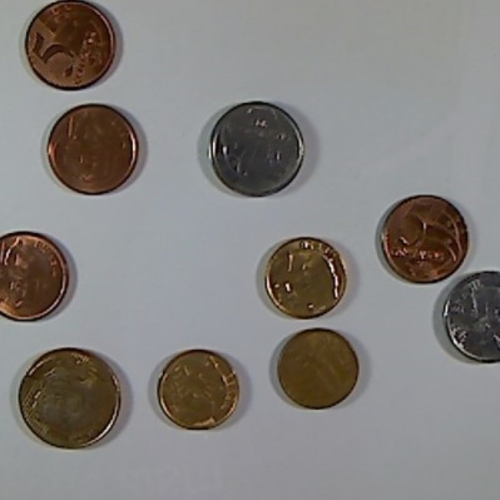

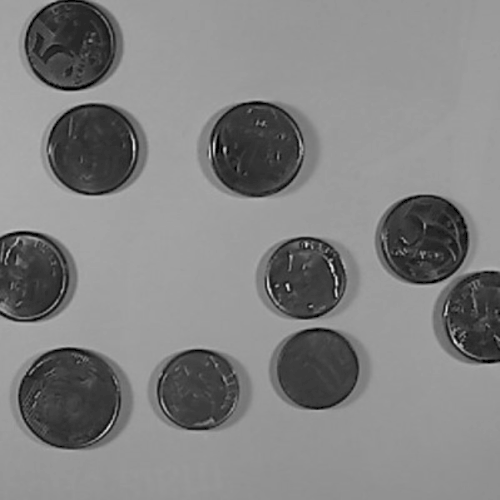

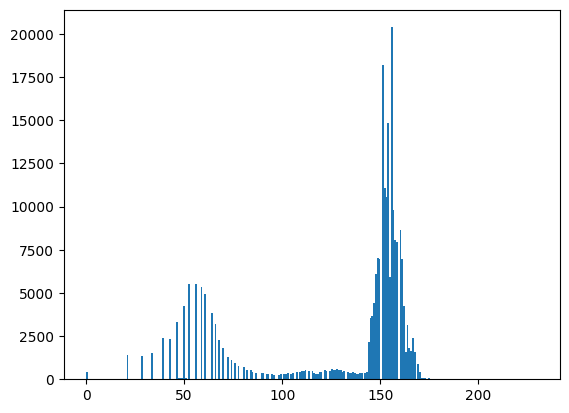

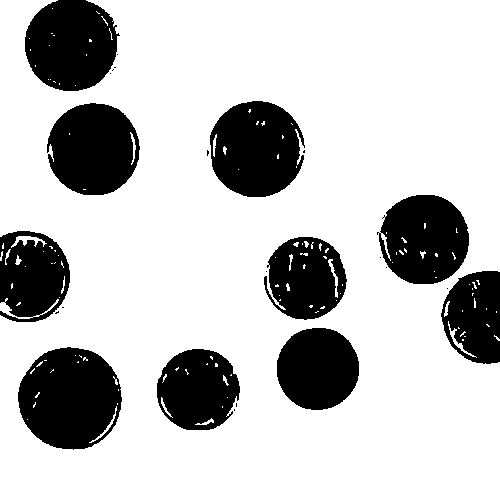

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img_color = cv.imread('/content/drive/MyDrive/image/coins2.png')
img_gray = cv.imread('/content/drive/MyDrive/image/coins2.png',0)
# global thresholding
ret1,th1 = cv.threshold(img_gray,100,255,cv.THRESH_BINARY)
cv2_imshow(img_color)
cv2_imshow(img_gray)
plt.hist(img_gray.ravel(),256)
plt.show()
cv2_imshow(th1)



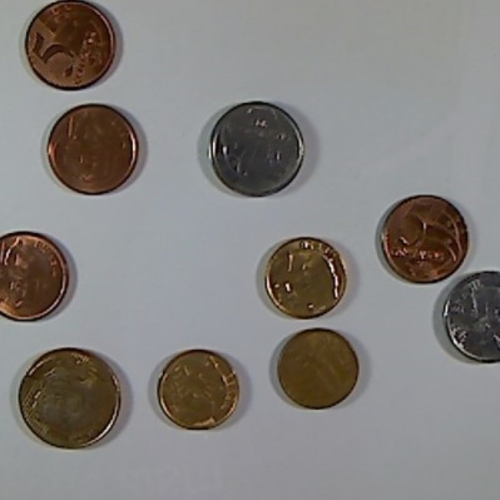

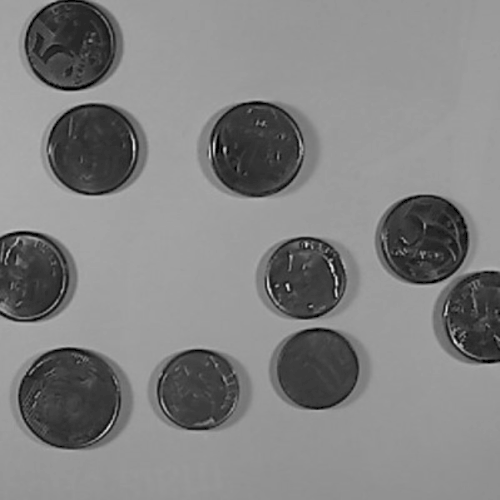

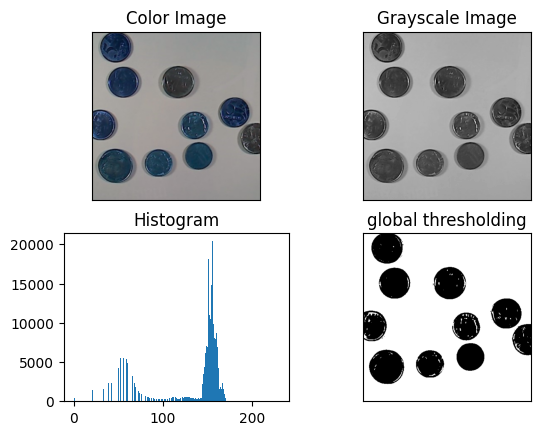

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img_color = cv.imread('coins2.png')
img_gray = cv.imread('coins2.png',0)
# global thresholding
ret1,th1 = cv.threshold(img_gray,100,255,cv.THRESH_BINARY)
cv2_imshow(img_color)
cv2_imshow(img_gray)

#show image
images = [img_color,
          img_gray,
          th1]
titles = ['Color Image','Grayscale Image','Histogram','global thresholding']


plt.subplot(2,2,1),plt.imshow(images[0],'gray')
plt.title(titles[0]), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,2),plt.imshow(images[1],'gray')
plt.title(titles[1]), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,3),plt.hist(images[1].ravel(),256)
plt.title(titles[2])

plt.subplot(2,2,4),plt.imshow(images[2],'gray')
plt.title(titles[3]), plt.xticks([]), plt.yticks([])

plt.show()

Color Image


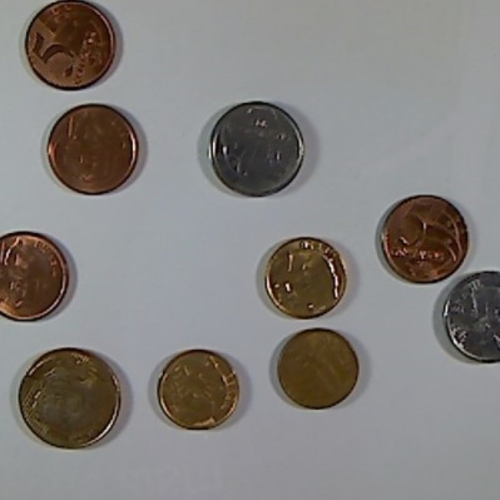

Grayscale Image


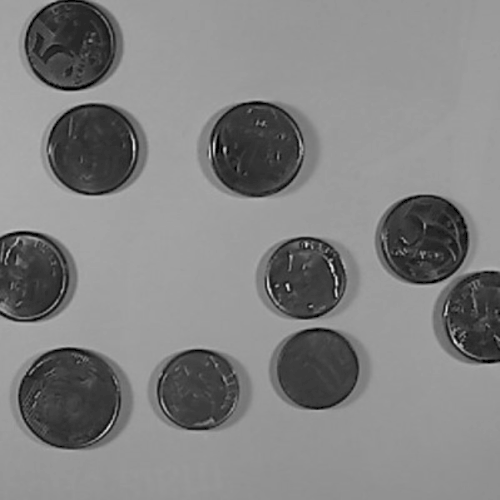

global thresholding


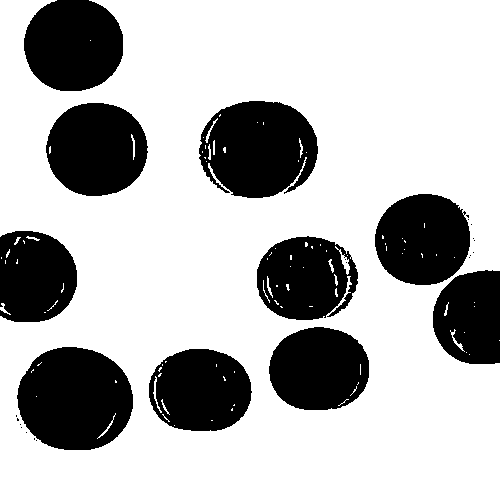

Invert global thresholding


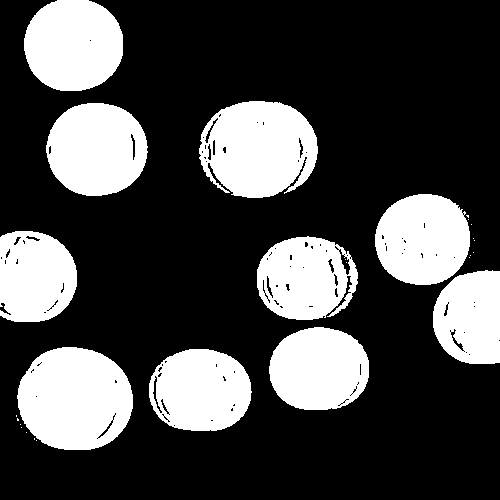

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img_color = cv.imread('coins2.png')
img_gray = cv.imread('coins2.png',0)
# global thresholding
ret1,th1 = cv.threshold(img_gray,130,255,cv.THRESH_BINARY)
ret2,th2 = cv.threshold(img_gray,130,255,cv.THRESH_BINARY_INV)
print("Color Image")
cv2_imshow(img_color)
print("Grayscale Image")
cv2_imshow(img_gray)
print("global thresholding")
cv2_imshow(th1)
print("Invert global thresholding")
cv2_imshow(th2)


#โจทย์ 1
ลดช่องโหว่งในเหรียญ

# Otsu’s Threshold
https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html

Color Image


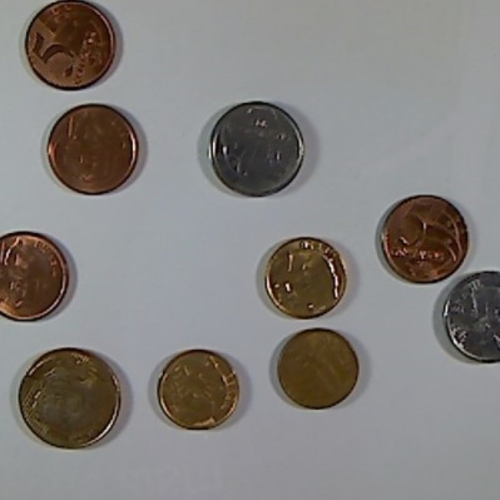

Grayscale Image


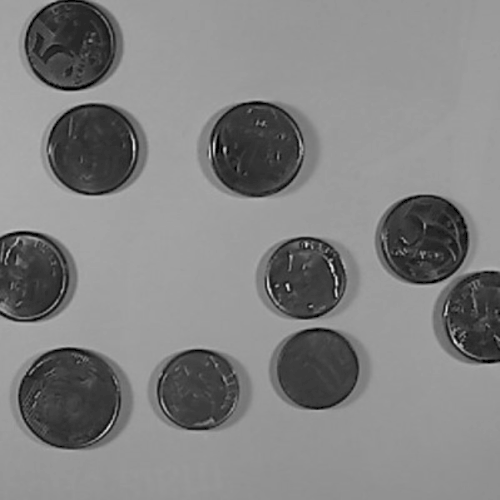

global thresholding


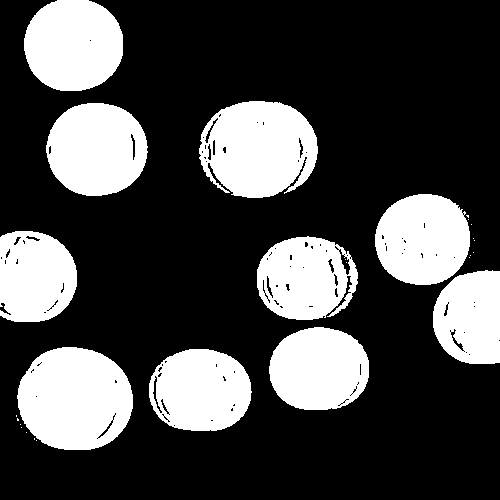

close img


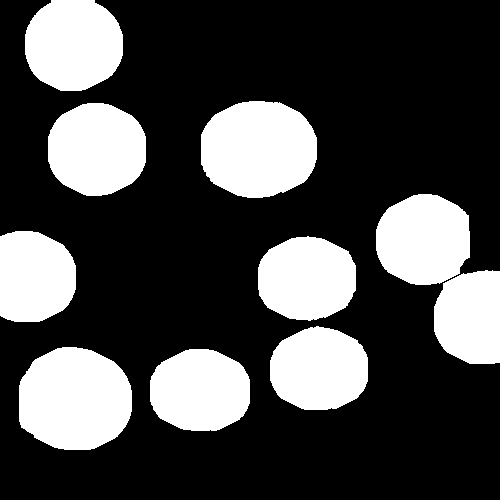

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
img = cv.imread('coins2.png',0)

# แบบที่ 1 #ไม่ได้ใช้
Gblur = cv.GaussianBlur(img_color,(7,7),0)
blur = cv.blur(img_gray,(7,7))


# global thresholding
ret1,th1 = cv.threshold(img,130,255,cv.THRESH_BINARY)
ret1,th1 = cv.threshold(img,130,255,cv.THRESH_BINARY_INV)


# แบบ ที่2
kernel  = cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5))
close_img = cv.morphologyEx(th1,cv.MORPH_CLOSE,kernel,iterations=2)
Open_img = cv.morphologyEx(close_img,cv.MORPH_OPEN,kernel,iterations=10)
# erode_img = cv.erode(close_img,kernel,iterations=6)

# # Otsu's thresholding
# ret2,th2 = cv.threshold(img,200,255,cv.THRESH_OTSU)

print("Color Image")
cv2_imshow(img_color)
print("Grayscale Image")
cv2_imshow(img_gray)
print("global thresholding")
cv2_imshow(th1)
print("close img")
cv2_imshow(Open_img)

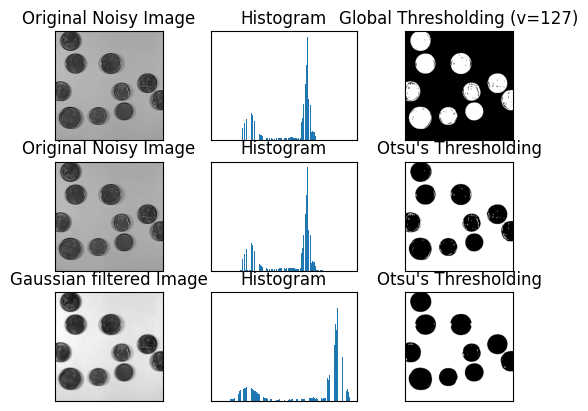

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
img = cv.imread('coins2.png',0)
# global thresholding
ret1,th1 = cv.threshold(img,100,255,cv.THRESH_BINARY_INV)

# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(img,(11,11),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# plot all the images and their histograms

images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])

plt.show()


# Adaptive Thresholding
adTh = adaptiveThreshold(src, dst, maxValue, adaptiveMethod, thresholdType, blockSize, C)
https://www.tutorialspoint.com/opencv/opencv_adaptive_threshold.htm
This method accepts the following parameters −

src − An object of the class Mat representing the source (input) image.

dst − An object of the class Mat representing the destination (output) image.

maxValue − A variable of double type representing the value that is to be given if pixel value is more than the threshold value.

adaptiveMethod − A variable of integer the type representing the adaptive method to be used. This will be either of the following two values

ADAPTIVE_THRESH_MEAN_C − threshold value is the mean of neighborhood area.

ADAPTIVE_THRESH_GAUSSIAN_C − threshold value is the weighted sum of neighborhood values where weights are a Gaussian window.

thresholdType − A variable of integer type representing the type of threshold to be used.

blockSize − A variable of the integer type representing size of the pixelneighborhood used to calculate the threshold value.

C − A variable of double type representing the constant used in the both methods (subtracted from the mean or weighted mean).

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('sudoku.jpg',0)
img = cv.medianBlur(img,5)
ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,7,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,7,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

error: ignored

# Image Gradients
cv2.blur(image, ขนาดของ Filter)

cv2.GaussianBlur(รูปภาพ,ขนาดของ Filter, sigma)

cv2. Sobel(image, -1, dx, dy, [ksize= ขนาดของ Filter])

cv2.Laplacian(image, -1,  [ksize= ขนาดของ Filter])

dst=cv2.Canny(image, threshold1, threshold2, Filtersize)




In [ ]:
import cv2
import numpy as np
# Load the image in greyscale
img = cv2.imread('sudoku.jpg',0)
# Apply Gaussian Blur
blur = cv2.GaussianBlur(img,(3,3),0)
# Apply Laplacian operator in some higher datatype
ret3,th3 = cv.threshold(blur,50,255,cv.THRESH_OTSU)
laplacian = cv2.Laplacian(img,10)
sobelxy = cv2.Sobel(img,-1,1,1,11)
CannyImg = cv2.Canny(img, 30, 200)

cv2_imshow(img)
cv2_imshow(blur)
cv2_imshow(laplacian)
cv2_imshow(sobelxy)
cv2_imshow(CannyImg)

error: ignored

# การค้นหาและวาดรูปทรงของวัตถุ
Find and Draw Contours using OpenCV

contours, hierarchy = cv2.findContours(image, mode, method)

image = cv2.drawContours(image, contours, contourIdx, color[, thickness[, lineType]])


In [ ]:
import cv2
import numpy as np
image = cv2.imread('shape.png')

# Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Find Canny edges
# หาเส้นขอบ .Canny
edged = cv2.Canny(gray, 30, 200)
cv2_imshow(edged)

# Finding Contours
# fierachy  ระดับชั้น
contours, hierarchy = cv2.findContours(edged,  cv2.RETR_EXTERNAL , cv2.CHAIN_APPROX_NONE)
print("Number of Contours found = " + str(len(contours)))
#print(contours)
# Draw all contours
# -1 signifies drawing all contours
cv2.drawContours(image, contours, -1, (0, 255, 50), 5)
cv2_imshow(image)

error: ignored

In [1]:
import cv2
import numpy as np
image = cv2.imread('shape.png')

# Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Find Canny edges
edged = cv2.Canny(gray, 30, 200)
cv2_imshow(edged)


# Finding Contours
contours, hierarchy = cv2.findContours(edged,  cv2.RETR_EXTERNAL , cv2.CHAIN_APPROX_NONE)
print("Number of Contours found = " + str(len(contours)))

# Draw all contours
# -1 signifies drawing all contours
cv2.drawContours(image, contours, -1, (0, 255, 0), 3)



# หาจุดศูนย์กลาง
i=1
for c in contours:
# calculate moments for each contour
   M = cv2.moments(c)
   # calculate x,y coordinate of center
   cX = int(M["m10"] / M["m00"])
   cY = int(M["m01"] / M["m00"])

  #  สร้างจุดศูนย์กลาง
   cv2.circle(image, (cX, cY), 5, (255, 255, 255), -1)
   cv2.putText(image, str(i), (cX - 25, cY - 25),cv2.FONT_HERSHEY_SIMPLEX,1, (255, 255, 255), 2)
   # display the image
   i=i+1

cv2_imshow(image)



error: ignored

In [ ]:
# หา เส้นขอบเฉพาะสีเขียว Contours

import cv2
import numpy as np
frame = cv2.imread('shape.png')
blurred_frame = cv2.GaussianBlur(frame, (5, 5), 0)
hsv = cv2.cvtColor(blurred_frame, cv2.COLOR_BGR2HSV)
lower_green = np.array([38, 86, 0])
upper_green = np.array([121, 255, 255])
mask = cv2.inRange(hsv, lower_green , upper_green)
cv2_imshow(mask)

contours,h = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
print("Number of Green Color Object = " + str(len(contours)))
cv2.drawContours(frame, contours, -1, (0, 0, 255), 3)
cv2_imshow(frame)


error: ignored

#โจทย์ 2
แบ่งส่วนมะนาว ("testcolor.JPG")

In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

img = cv.imread('/content/drive/MyDrive/image/testcolor.JPG')
cv2_imshow(img)

img_gray = cv.imread('/content/drive/MyDrive/image/testcolor.JPG',0)
# cv2_imshow(img_gray)
blur = cv.GaussianBlur(img_gray,(11,11),1)
# print("Blur IMG")
# cv2_imshow(blur)

# global thresholding
ret1,th1 = cv.threshold(blur,100,255,cv.THRESH_BINARY)
cv2_imshow(th1)

# แบบ ที่2
kernel  = cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5))
dilate = cv.dilate(th1,kernel,iterations= 6)
open = cv.morphologyEx(dilate,cv.MORPH_OPEN,kernel,iterations=10)



cv2_imshow(open)



#

Output hidden; open in https://colab.research.google.com to view.

#โจทย์ 3
นับจำนวนมะนาวทั้งหมด ("testcolor.JPG")

In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow



image = cv.imread('/content/drive/MyDrive/image/testcolor.JPG',)
img_gray = cv.imread('/content/drive/MyDrive/image/testcolor.JPG',0)
# cv2_imshow(img_gray)
blur = cv.GaussianBlur(img_gray,(11,11),1)
# print("Blur IMG")
# cv2_imshow(blur)

# global thresholding
ret1,th1 = cv.threshold(blur,100,255,cv.THRESH_BINARY)
cv2_imshow(th1)

# แบบ ที่2
kernel  = cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5))
dilate = cv.dilate(th1,kernel,iterations= 6)
open = cv.morphologyEx(dilate,cv.MORPH_OPEN,kernel,iterations=10)

# Find Canny edges
edged = cv.Canny(open, 30, 200)
# cv2_imshow(edged)


# Finding Contours
contours, hierarchy = cv.findContours(edged,  cv.RETR_EXTERNAL , cv.CHAIN_APPROX_NONE)
print("Number of Contours found = " + str(len(contours)))

# Draw all contours
# -1 signifies drawing all contours
cv.drawContours(image, contours, -1, (0, 255, 0), 3)



# หาจุดศูนย์กลาง
i=1
for c in contours:
# calculate moments for each contour
   M = cv.moments(c)
   # calculate x,y coordinate of center
   cX = int(M["m10"] / M["m00"])
   cY = int(M["m01"] / M["m00"])


  #  สร้างชื่อหรือตัวเลข
   cv.putText(image, str(i), (cX - 25, cY - 25),cv.FONT_HERSHEY_SIMPLEX,1, (0, 0, 255), 2)
   # display the image
   i=i+1

cv2_imshow(image)




Output hidden; open in https://colab.research.google.com to view.

# โจทย์ 4
การวัดเส้นรอบรูปมะนาว

cv2.arcLength(contour,True)

In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

image = cv.imread('/content/drive/MyDrive/image/testcolor.JPG')
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
blur = cv.GaussianBlur(gray, (11,11), 1)
cv2_imshow(blur)

# global thresholding
ret1, th1 = cv.threshold(blur, 100, 255, cv.THRESH_BINARY)
cv2_imshow(th1)

# แบบที่2
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5, 5))
dilate = cv.dilate(th1, kernel, iterations=6)
open = cv.morphologyEx(dilate, cv.MORPH_OPEN, kernel, iterations=10)

# Find Canny edges
edged = cv.Canny(open, 30, 200)

# Finding Contours
contours, hierarchy = cv.findContours(edged, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
print("Number of Contours found = " + str(len(contours)))

# Draw all contours
# -1 signifies drawing all contours
cv.drawContours(image, contours, -1, (0, 255, 0), 3)

# หาจุดศูนย์กลางและพื้นที่ของวัตถุ
for c in contours:
    # calculate moments for each contour
    M = cv.moments(c)
    # calculate x,y coordinate of center
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    # calculate area
    C_arc=cv2.arcLength(c,True)

    # แสดงข้อมูลในภาพ
    cv.putText(image, f"{C_arc}", (cX, cY), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
    # แสดงศูนย์กลาง
    cv.circle(image, (cX, cY), 7, (255, 255, 0), -1)

cv2_imshow(image)


Output hidden; open in https://colab.research.google.com to view.

#โจทย์ 5
แบ่งส่วนมะนาวแต่ละสี

In [ ]:
#หาคอนทัวสีเขียว

import cv2

import numpy as np

frame = cv2.imread('/content/drive/MyDrive/image/testcolor.JPG')
frame2 = cv2.imread('/content/drive/MyDrive/image/testcolor.JPG')

blurred_frame = cv2.GaussianBlur(frame, (5, 5), 0)
blurred_frame = cv2.GaussianBlur(frame2, (5, 5), 0)

hsv = cv2.cvtColor(blurred_frame, cv2.COLOR_BGR2HSV)

# green

lower_green = np.array([30, 50,50])

upper_green = np.array([60, 255, 255])

mask = cv2.inRange(hsv, lower_green , upper_green)

# cv2_imshow(mask)



# yellow

lower_yellow = np.array([20, 100, 100])

upper_yellow = np.array([30, 255, 255])

mask2 = cv2.inRange(hsv, lower_yellow , upper_yellow)
# cv2_imshow(mask2)



# ลดรูป green

kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5))

dilate_img = cv2.dilate(mask,kernel,iterations=10)

opening1= cv.morphologyEx(dilate_img, cv.MORPH_OPEN,kernel, iterations=30)

# cv2_imshow(opening1)

# ลดรูปเหลือง

kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5))

dilate_img2 = cv2.dilate(mask2,kernel,iterations=10)

opening2 = cv.morphologyEx(dilate_img2, cv.MORPH_OPEN,kernel, iterations=30)

cv2_imshow(opening2)



contours, h = cv2.findContours(opening1, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
print("Number of Green Color Object = " + str(len(contours)))
cv2.drawContours(frame, contours, -1, (0, 0, 255), 3)


cv2_imshow(frame)


contours, h = cv2.findContours(opening2, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
print("Number of Yellow Color Object = " + str(len(contours)))
cv2.drawContours(frame2, contours, -1, (0, 255, 0), 3)

cv2_imshow(frame2)




Output hidden; open in https://colab.research.google.com to view.